# New York City Restaurant Inspections

We will analyze restaurant inspections in New York City, starting November 1, 2014 and ending January 31, 2015. 
The data is in the file <a href="NYCRestaurants.csv">NYCRestaurants.csv</a>.

In [57]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# The dtype=str tells Pandas to load in all columns as strings.
# I do this because I know they are strings, and Pandas doesn't have to spend time figuring out the column dtypes.
df = pd.read_csv('NYCRestaurants.csv', dtype=str)

#### [Q1, 6 points] Create a unique name for each restaurant.
On the DataFrame created above, add a new column to your DataFrame called 'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields. For example:
<pre>WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN</pre>

Print the first 10 values of the RESTAURANT column of your DataFrame.

In [14]:
df['RESTAURANT'] = df[['DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'BORO']].apply(lambda x: ' '.join(x), axis=1) #df <- df %>% unite(RESTAURANT, DBA, BUILDING, STREET, ZIPCODE, BORO, sep = ' ')
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN


#### [Q2, 6 points] How many restaurants are included in the data?
Careful now:

*  A *Subway* in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [79]:
# Drop duplicates in the DataFrame 'df' based on the 'RESTAURANT' column and create a new DataFrame 'rest_df'
# 'rest_df' will contain only unique restaurants (if there are multiple Wendy's with different addresses, only one will be kept)
rest_df = df.drop_duplicates(subset=['RESTAURANT'])

# Calculate the count of unique restaurants in the DataFrame 'rest_df'
rest_count = len(rest_df)

# Print the total number of unique restaurants found in the DataFrame
print("Number of Restaurants =", rest_count)

# Display the DataFrame 'rest_df', which contains the unique restaurants
rest_df

Number of Restaurants = 10114


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
16,16,40358429,MAY MAY KITCHEN,BROOKLYN,1269,SUTTER AVENUE,11208,7182354485,Chinese,01/28/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,30,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,MAY MAY KITCHEN 1269 SUTTER AVENUE 11208 BROOKLYN
22,22,40360045,SEUDA FOODS,BROOKLYN,705,KINGS HIGHWAY,11223,7183751500,Jewish/Kosher,11/10/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11,A,11/10/2014,02/12/2015,Cycle Inspection / Re-inspection,SEUDA FOODS 705 KINGS HIGHWAY 11223 BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44621,44621,50019007,Andy's Cuisine Restaurant,BRONX,1444,WILLIAMSBRIDGE RD,10461,7186841511,Caribbean,01/29/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44622,44622,50019034,YUMMY SZECHUAN HOUSE,QUEENS,4026,UNION ST,11354,7188867885,Chinese,01/28/2015,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,32,Not Yet Graded,NaN,02/12/2015,Pre-permit (Operational) / Initial Inspection,YUMMY SZECHUAN HOUSE 4026 UNION ST 11354 QUEENS
44627,44627,50019062,NEW WORLD FAST FOOD,QUEENS,4021,MAIN ST,11354,6462440901,Other,01/26/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS
44628,44628,50019095,EARLY,BROOKLYN,967,MANHATTAN AVE,11222,9177577831,Sandwiches/Salads/Mixed Buffet,01/29/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,EARLY 967 MANHATTAN AVE 11222 BROOKLYN


#### [Q3, 6 points] How many chains are there?
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).

You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [106]:
# Count the number of occurrences of each 'DBA' (restaurant name) in the DataFrame 'rest_df'
num_rest = rest_df['DBA'].value_counts()

# Filter 'num_rest' to only include restaurants with 2 or more addresses, indicating a chain
num_chains = num_rest[num_rest >= 2]

# Print the number of chains (restaurants with 2 or more addresses) and the list of chain restaurants
print("Number of Chains =", len(num_chains))
print(num_chains)


Number of Chains = 368
SUBWAY                          144
MCDONALD'S                       79
STARBUCKS COFFEE                 74
DUNKIN' DONUTS                   69
DUNKIN DONUTS                    64
                               ... 
TONY'S PIZZERIA & RESTAURANT      2
NEW ASIAN CUISINE                 2
CORNER BISTRO                     2
FALAFEL OFF THE CORNER            2
NAPOLI PIZZA                      2
Name: DBA, Length: 368, dtype: int64


#### [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

<AxesSubplot:>

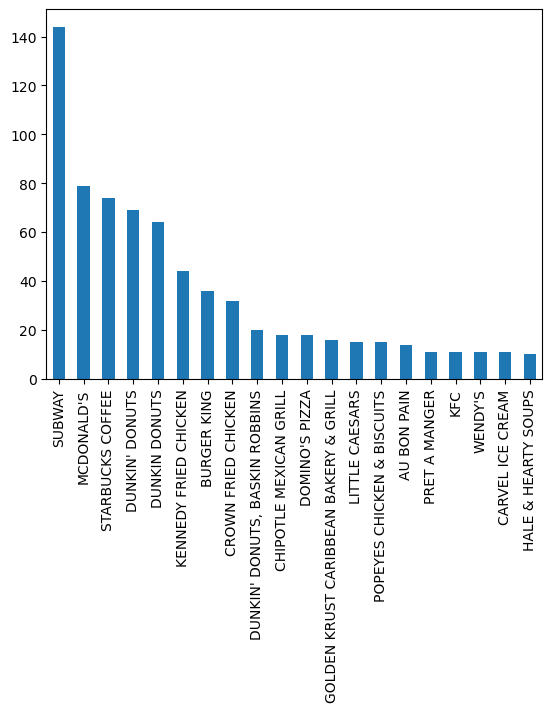

In [60]:
top_20_chains = num_chains[:20]
top_20_chains.plot(kind='bar')

#### [Q5, 6 points] What fraction of all restaurants are chain restaurants?

You should think of a restaurant as being one restaurant at one location.
So *Wendy's 5th Street* and *Wendy's on 10th Street* are two different restaurants.
Essentially a restaurant is what you defined in Q1.

In [107]:
frac_chains = sum(num_chains/len(rest_df))
print("Fraction of all restaurants that are chain restaurants:", frac_chains)

Fraction of all restaurants that are chain restaurants: 0.1647221672928614


#### [Q6, 6 points] Plot the number of non-chain restaurants in each boro.

We need several steps:
* Figure out all the non-chain restaurants.
* Then elect out only those restaurants.
* Finally plot the number of such restaurants by boro. 
* Make sure to look at the plot; we don't want to see... oh... the *missing* boro.

<AxesSubplot:>

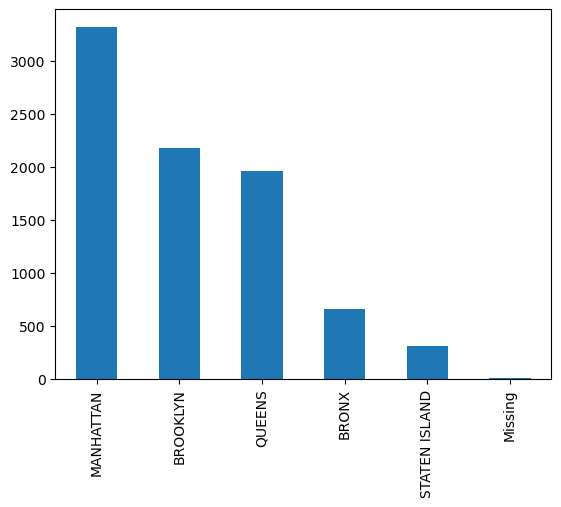

In [109]:
# Filter 'num_rest' to only include restaurants with less than 2 addresses (non-chains)
num_non_chains = num_rest[num_rest < 2]

# Filter 'rest_df' to get only non-chain restaurants based on 'DBA' (restaurant name) being in the index of 'num_non_chains'
non_chain_rests = rest_df[rest_df['DBA'].isin(num_non_chains.index)]

# Count the occurrences of each 'BORO' (borough) in the 'non_chain_rests' DataFrame and plot the counts in a bar chart
non_chain_rests['BORO'].value_counts().plot(kind='bar')

#### [Q7, 8 points] Plot the *fraction* of non-chain restaurants in each boro.
The boro with the most non-chain restaurants might just be the boro
with the most restaurants in general.

If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

#### [Q8, 6 points] Plot the popularity of cuisines.
Which cuisines are the most well-represented among all restaurants?

* Define the popularity of a cuisine as the number of restaurants serving that cuisine.
* Plot the popularity of the top 20 cuisines.

<AxesSubplot:>

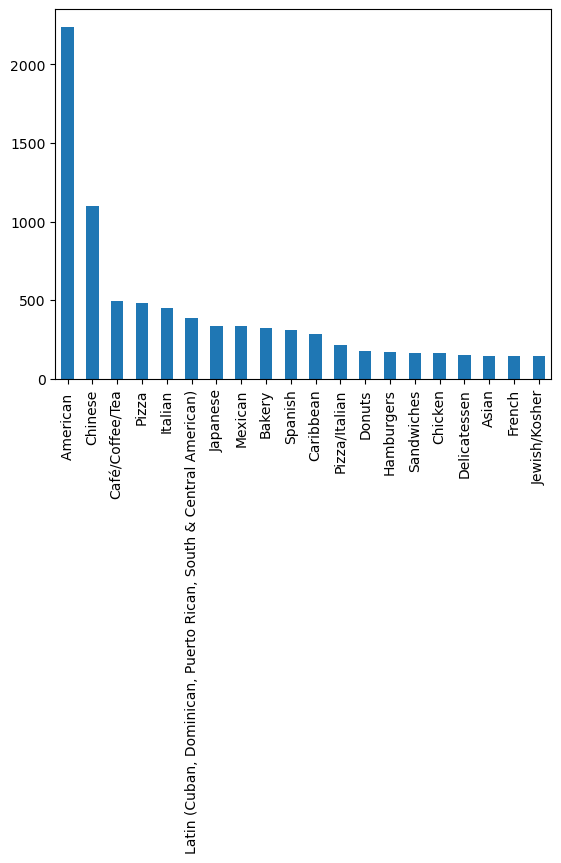

In [131]:
cuisines_df = df[['RESTAURANT', 'CUISINE DESCRIPTION']].drop_duplicates()
cuisines_df.set_index('CUISINE DESCRIPTION' , inplace = True)
cuisine_count = cuisines_df.index.value_counts()

cuisine_count[:20].plot(kind = 'bar')


#### [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations.
Ideally, you should explore and see what happens when there is no
violation, but here I will just tell you: the 'VIOLATION CODE' field
is missing.

* First, find the restaurants that were **never** cited for a code violation. 
* Then. compute the popularity of each cuisine among these "clean" restaurants.
* Plot the popularity of the top-20 among these cuisines.

/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_38310/1606116998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuisine_clean_df['is_clean'] = ~cuisine_clean_df['RESTAURANT'].isin(violation_df['RESTAURANT'])
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_38310/1606116998.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rest.drop_duplicates(inplace=True)


<AxesSubplot:>

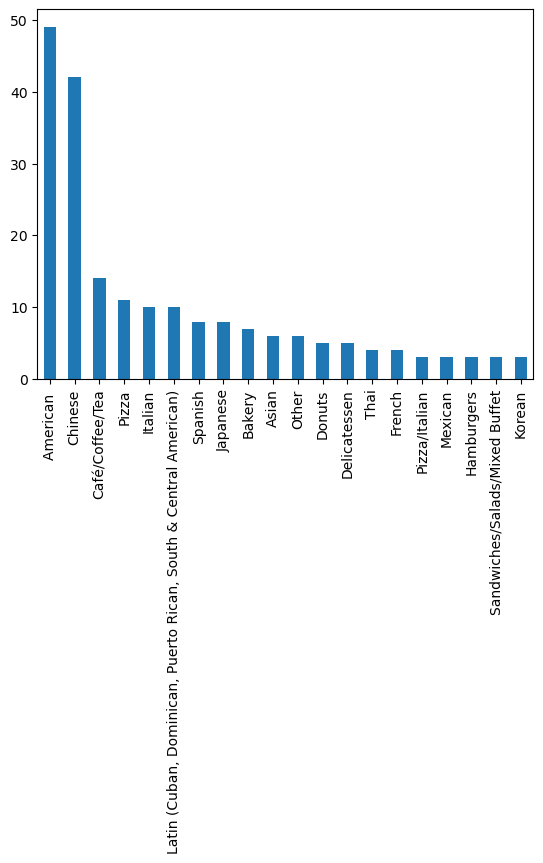

In [122]:
# Violation DataFrame with restaurants that have violations
violation_df = df[['RESTAURANT', 'VIOLATION CODE']].dropna(subset=['VIOLATION CODE'])

# Cuisine DataFrame with a new column 'is_clean' to mark clean restaurants
cuisine_clean_df = df[['RESTAURANT', 'CUISINE DESCRIPTION']]
cuisine_clean_df['is_clean'] = ~cuisine_clean_df['RESTAURANT'].isin(violation_df['RESTAURANT'])

# Filter cuisine_clean_df to get only clean restaurants
clean_rest = cuisine_clean_df[cuisine_clean_df['is_clean']]

# Drop duplicates in clean_rest DataFrame
clean_rest.drop_duplicates(inplace=True)

# Compute the popularity of each cuisine among clean restaurants
cuisine_clean_count = clean_rest['CUISINE DESCRIPTION'].value_counts()

# Plot the popularity of the top 20 cuisines among clean restaurants
cuisine_clean_count[:20].plot(kind='bar')


#### [Q10, 6 points] What cuisines tend to be the "cleanest"?

* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean."

<AxesSubplot:>

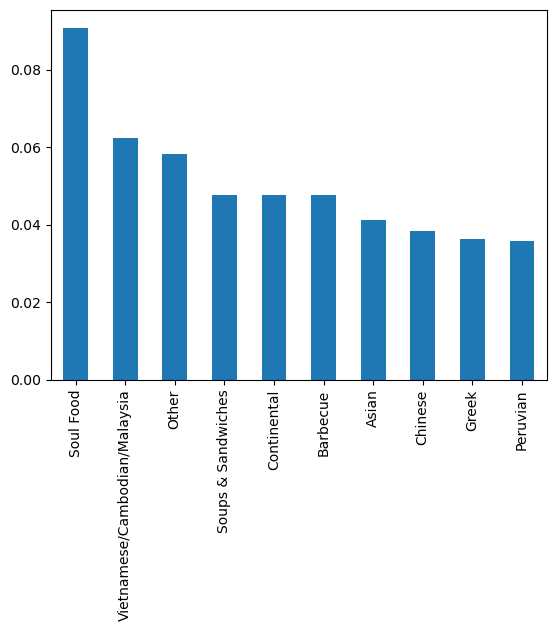

In [137]:
# Calculate the number of occurrences of each cuisine in the DataFrame 'cuisines_df'
cuisine_count = cuisines_df.index.value_counts()

# Apply a mask to only select cuisines with at least 20 restaurants
mask = cuisine_count >= 20
cuisine_count = cuisine_count[mask]

# Create a DataFrame 'cuisine_total_df' with 'Clean Count' and 'Total Count' for each cuisine
data = {'Clean Count': cuisine_clean_count, 'Total Count': cuisine_count}
cuisine_total_df = DataFrame(data).dropna(subset=['Total Count'])

# Calculate the 'Fraction Clean' for each cuisine
cuisine_total_df['Fraction Clean'] = cuisine_total_df['Clean Count'] / cuisine_total_df['Total Count']

# Sort the DataFrame 'cuisine_total_df' in descending order based on the 'Fraction Clean'
cuisine_total_df = cuisine_total_df.sort_values(by='Fraction Clean', ascending=False)

# Plot the top 10 cuisines with the highest 'Fraction Clean' as a bar plot
cuisine_total_df['Fraction Clean'][:10].plot(kind='bar')


#### [Q11, 8 points] What are the most common violations in each  borough?

* Create a table of the number of times each violation description was observed in each borough.
    * To create the table, check out the **crosstab** function. We will see a more general version of this when we discuss **groupby** in class.
* Figure out the most common violation description for each borough.

In [133]:
# Extract the relevant columns 'BORO' and 'VIOLATION CODE' from the DataFrame 'df'
violations_boro_df = df[['BORO', 'VIOLATION CODE']]

# Filter out rows where 'BORO' is 'Missing'
violations_boro_df = violations_boro_df[violations_boro_df['BORO'] != 'Missing']

# Create a cross-tabulation of violation codes for each borough and transpose the result
violations_boro_df = pd.crosstab(violations_boro_df['BORO'], violations_boro_df['VIOLATION CODE']).T

# Find the most common violation code (index) for each borough using 'idxmax()'
most_common_violation = violations_boro_df.idxmax()

print(most_common_violation)


BORO
BRONX            10F
BROOKLYN         10F
MANHATTAN        10F
QUEENS           10F
STATEN ISLAND    10F
dtype: object


#### [Q12, 9 points] What are the most common violations per borough, *after normalizing for the relative abundance of each violation?*

Hopefully, the answer to the previous question left you unsatisfied,
because some violations are just very common, irrespective of borough.
A better approach would be to **normalize** the violation counts, as
follows.

* **Get overall frequencies:** Figure out how common each violation is, over the entire dataset; let's call this <tt>violationFrequency</tt>.
* **Normalize:** Consider the table of number of violations by borough that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by <tt>violationFrequency</tt>. We want to do this **for each borough**.
* **Find the biggest violations:** After this normalization, for each borough, figure out the most common violation description.

In [134]:
# Calculate the frequency of each violation code in the DataFrame 'df'
violation_frequency = df['VIOLATION CODE'].value_counts()

# Calculate the normalized violation frequency for each violation code in each borough
# The DataFrame 'violations_boro_df' contains the count of each violation code in each borough.
# To normalize, divide each value in 'violations_boro_df' by the corresponding violation frequency.
violations_norm_df = violations_boro_df.div(violation_frequency, axis=0)

# Find the violation code with the highest normalized count in each borough
# For each borough, 'idxmax()' returns the violation code with the highest normalized count.
print(violations_norm_df.idxmax())


BORO
BRONX            04I
BROOKLYN         02D
MANHATTAN        03E
QUEENS           03G
STATEN ISLAND    03C
dtype: object


#### [Q13, 8 points] How many phone area codes correspond to a single zipcode?
The first three digits of the restaurant phone numbers are their area
codes. The area codes do not generally align with zip codes, but some
area codes are only for a single zip code. You must figure out how
many area codes have this property.

*Hint:* To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

In [138]:
# Extract the 'ZIPCODE' column from the DataFrame 'df' and create a new DataFrame 'df_zip'
df_zip = df[['ZIPCODE']]

# Extract the first three characters of the 'PHONE' column and create a new column 'AREA CODE' in 'df_zip'
df_zip['AREA CODE'] = df['PHONE'].str[0:3]

# Set the 'AREA CODE' as the index of 'df_zip' to facilitate further analysis
df_zip.set_index(['AREA CODE'], inplace=True)

# Drop any duplicate rows in 'df_zip'
df_zip.drop_duplicates(inplace=True)

# Count the occurrences of each 'AREA CODE' and store the counts in 'zip_counts'
zip_counts = df_zip.index.value_counts()

# Apply a mask to 'zip_counts' to identify 'AREA CODE's that occur only once (mask = zip_counts == 1)
mask = zip_counts == 1

# Print the 'AREA CODE's that occur only once
print(zip_counts[mask].index.values)


['347' '516']


/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_38310/2733099350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zip['AREA CODE'] = df['PHONE'].str[0:3]
/var/folders/3n/vbk6t28d0csbtrc7sh3_8mwr0000gn/T/ipykernel_38310/2733099350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zip.drop_duplicates(inplace=True)


#### [Q14, 10 points] Find common misspellings of street names.
Sometimes, it's "Avenue", and sometimes, it's "Ave". We will
try to come up with an automated way to find common misspellings. The
idea is the following: if "Ave" and "Avenue" are the same,
they should show up often in similar-sounding street names, e.g., *Lexington Ave* and *Lexington Avenue*.

* Create a new column, called <tt>STREET TYPE</tt>, which is the the last word in the name of the street.
    * For example, if the street is *Astoria Boulevard*, the street type should be *Boulevard*.
* Create another column, called <tt>STREET BASE</tt>, which contains everything **except** the last word in the name of the street.
    * For example, if the street is *Astoria Boulevard*, the street base should be *Astoria*.
* Create a third column, called <tt>STREET BASE & ZIP</tt>, that combines the street base and the zipcode.
* Create a table containing just these three columns, and remove any duplicates or instances where street base is empty.
    * This table now contains unique street names, along with the street type.
* Merge this table with itself, on the <tt>STREET BASE & ZIP</tt> column. 
    * Thus, in the new merged tabled, we will have two <tt>STREET TYPE</tt> fields for each street base and zipcode.
    * For example, if both *Lexington Ave* and *Lexington Avenue* exist in the same zipcode, we will get a row for the street base *Lexington* and the two street types *Ave* and *Avenue*.
* From the merged table, select only the rows where the street types are different.
* Now, do a cross-tabulation of the two distinct street types (check out the **crosstab** function in Pandas).
    * This gives us the number of times *Ave* and *Avenue* were used with the same <tt>STREET BASE & ZIP</tt>.
* From this cross-tabulation table, find the most commonly street type that occurs with each of the following: *AVE*, *ST*, *RD*, *PL*, *BOULEARD*, and *BULEVARD*.

In [139]:
# Split 'STREET' column to extract the last word as 'STREET TYPE'
df['STREET TYPE'] = df['STREET'].str.split().str[-1]

# Extract the part of 'STREET' before the last word as 'STREET BASE'
df['STREET BASE'] = df['STREET'].str.split().str[:-1].str.join(' ')

# Create a new column 'STREET BASE & ZIP' by combining 'STREET BASE' and 'ZIPCODE'
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

# Create a new DataFrame 'df_street' with 'STREET TYPE', 'STREET BASE', and 'STREET BASE & ZIP' columns
df_street = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']]

# Drop duplicates based on 'STREET BASE & ZIP'
df_street = df_street.drop_duplicates()

# Filter out rows where 'STREET BASE' is not empty
mask = df_street['STREET BASE'] != ''
df_street = df_street[mask]

# Merge the 'df_street' DataFrame with itself based on 'STREET BASE & ZIP'
# This will create combinations of 'STREET BASE' with the same 'STREET BASE & ZIP'
df_street = df_street.merge(df_street,
                            left_on='STREET BASE & ZIP',
                            right_on='STREET BASE & ZIP',
                            suffixes=[' 1', ' 2'])

# Filter out rows where 'STREET TYPE' from the two merged dataframes are different
mask = df_street['STREET TYPE 1'] != df_street['STREET TYPE 2']
df_street = df_street[mask]

# Create a crosstab of 'STREET TYPE 1' and 'STREET TYPE 2' to count occurrences of pairs
df_street = pd.crosstab(df_street['STREET TYPE 1'], df_street['STREET TYPE 2'])

# Find the most common pairs of 'STREET TYPE' values for each type
most_common_ave = df_street['AVE'].idxmax()
most_common_st = df_street['ST'].idxmax()
most_common_rd = df_street['RD'].idxmax()
most_common_pl = df_street['PL'].idxmax()
most_common_boulevard = df_street['BOULEARD'].idxmax()  # Typo in the original code
most_common_boulevard = df_street['BOULEVARD'].idxmax()  # Corrected typo

# Print the most common pairs of 'STREET TYPE' values for each type
print("Most Common Pair for AVE:", most_common_ave)
print("Most Common Pair for ST:", most_common_st)
print("Most Common Pair for RD:", most_common_rd)
print("Most Common Pair for PL:", most_common_pl)
print("Most Common Pair for BOULEVARD:", most_common_boulevard)


Most Common Pair for AVE: AVENUE
Most Common Pair for ST: STREET
Most Common Pair for RD: ROAD
Most Common Pair for PL: PLACE
Most Common Pair for BOULEVARD: BLVD
